In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
from data_treatment import update_dataframe, update_all
from make_figures import do_SR, do_SR_mesa, do_2dplot, do_all
from os import listdir
from os.path import isfile, join
%matplotlib inline

datadir = '../data/'
data_files = [f for f in listdir(datadir) if isfile(join(datadir, f))]

df = [pd.read_json("../data/"+data,lines=True) for data in data_files]
df_final = pd.concat(df)

In [2]:
variables = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',u'municipio', u'parroquia','Abstencion_%',
       u'PSUV_%',u'PSUV_N',u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',
       u'municipio_residual',u'centro_residual',u'estado_residual',
       u'parroquia_standardised_residual', u'municipio_standardised_residual',u'centro_standardised_residual',
          u'estado_standardised_residual',u'parroquia_standardised_residual_abstention',]


df_out = update_all(df_final)[variables]

df_out

EDO. AMAZONAS


data_treatment.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Abstencion_%'] = df['ABSTENCION'] / df['ELECTORES INSCRITOS']
data_treatment.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['turnout'] = 1 - df['Abstencion_%']
data_treatment.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['PSUV_%

EDO. ANZOATEGUI
EDO. APURE
EDO. ARAGUA
EDO. BARINAS
EDO. BOLIVAR
EDO. CARABOBO
EDO. COJEDES
EDO. DELTA AMACURO
EDO. FALCON
EDO. GUARICO
EDO. LARA


data_treatment.py:47: RuntimeWarning: invalid value encountered in double_scalars
  average = centro[PSUV].sum() / float(centro['VOTOS ESCRUTADOS'].sum())
data_treatment.py:123: RuntimeWarning: divide by zero encountered in double_scalars
  abstention_centro_residual.append(1 - (abstention_val / float(centro_average_abstention[centro])))


EDO. MERIDA
EDO. MIRANDA
EDO. MONAGAS
EDO. NVA.ESPARTA
EDO. PORTUGUESA


data_treatment.py:116: RuntimeWarning: invalid value encountered in double_scalars
  centro_residual.append(1-(psuv_val/float(centro_average[centro])))


EDO. SUCRE
EDO. TACHIRA
EDO. TRUJILLO
EDO. VARGAS
EDO. YARACUY
EDO. ZULIA


,ABSTENCION,ACTAS,ACTAS ESCRUTADAS,ACTAS VALIDAS,ELECTORES ACTAS TRANSMITIDAS,ELECTORES INSCRITOS,VOTANTES ESCRUTADOS,VOTOS ESCRUTADOS,VOTOS NULOS,VOTOS VALIDOS,...,rescaled_N,parroquia_residual,municipio_residual,centro_residual,estado_residual,parroquia_standardised_residual,municipio_standardised_residual,centro_standardised_residual,estado_standardised_residual,parroquia_standardised_residual_abstention
0,56.0,1,1,1,157.0,157.0,101.0,101.0,0,101.0,...,-0.418072,-0.129917,-0.192589,0.000000,-0.351080,-0.758341,-0.898814,0.000000,-1.461988,0.819787
1,257.0,1,1,1,406.0,406.0,149.0,149.0,1,148.0,...,-0.418072,0.112657,0.063440,0.106162,-0.061026,0.657590,0.296075,3.638373,-0.254126,-1.369053
2,256.0,1,1,1,400.0,400.0,144.0,144.0,0,144.0,...,-0.418072,-0.101784,-0.162895,-0.109848,-0.317440,-0.594125,-0.760234,-3.764706,-1.321904,-1.424465
3,102.0,1,1,1,280.0,280.0,178.0,178.0,1,177.0,...,-0.418072,0.061757,0.009717,0.000000,-0.121889,0.360480,0.045347,0.000000,-0.507576,0.759601
4,32.0,1,1,1,78.0,78.0,46.0,46.0,0,46.0,...,-0.418072,0.330664,0.521004,0.000000,0.457347,1.930116,2.431532,0.000000,1.904515,0.764527
5,123.0,1,1,1,270.0,270.0,147.0,147.0,0,147.0,...,-0.418072,-0.005371,0.280529,0.000000,0.184914,-0.031349,1.309231,0.000000,0.770029,0.446443
6,134.0,1,1,1,253.0,253.0,119.0,119.0,0,119.0,...,-0.418072,-0.121185,0.197649,0.000000,0.091019,-0.707371,0.922428,0.000000,0.379026,-0.073796
7,169.0,1,1,1,319.0,319.0,150.0,150.0,1,149.0,...,-0.418072,-0.001655,0.069684,0.000000,-0.053952,-0.009660,0.325215,0.000000,-0.224670,-1.542111
8,296.0,1,1,1,440.0,440.0,144.0,144.0,0,144.0,...,-0.418072,-0.098306,-0.020084,-0.099228,-0.155649,-0.573820,-0.093730,-3.400708,-0.648164,-2.941787
9,287.0,1,1,1,439.0,439.0,152.0,152.0,0,152.0,...,-0.418072,0.094765,0.159236,0.094005,0.047502,0.553152,0.743158,3.221723,0.197810,-2.756053


# Data:

Results from Merida, Vargas, Monagas and Delta Amacuro.

Data unit is the result in each 'mesa' of an electoral centre. 

ValueError: max must be larger than min in range parameter.

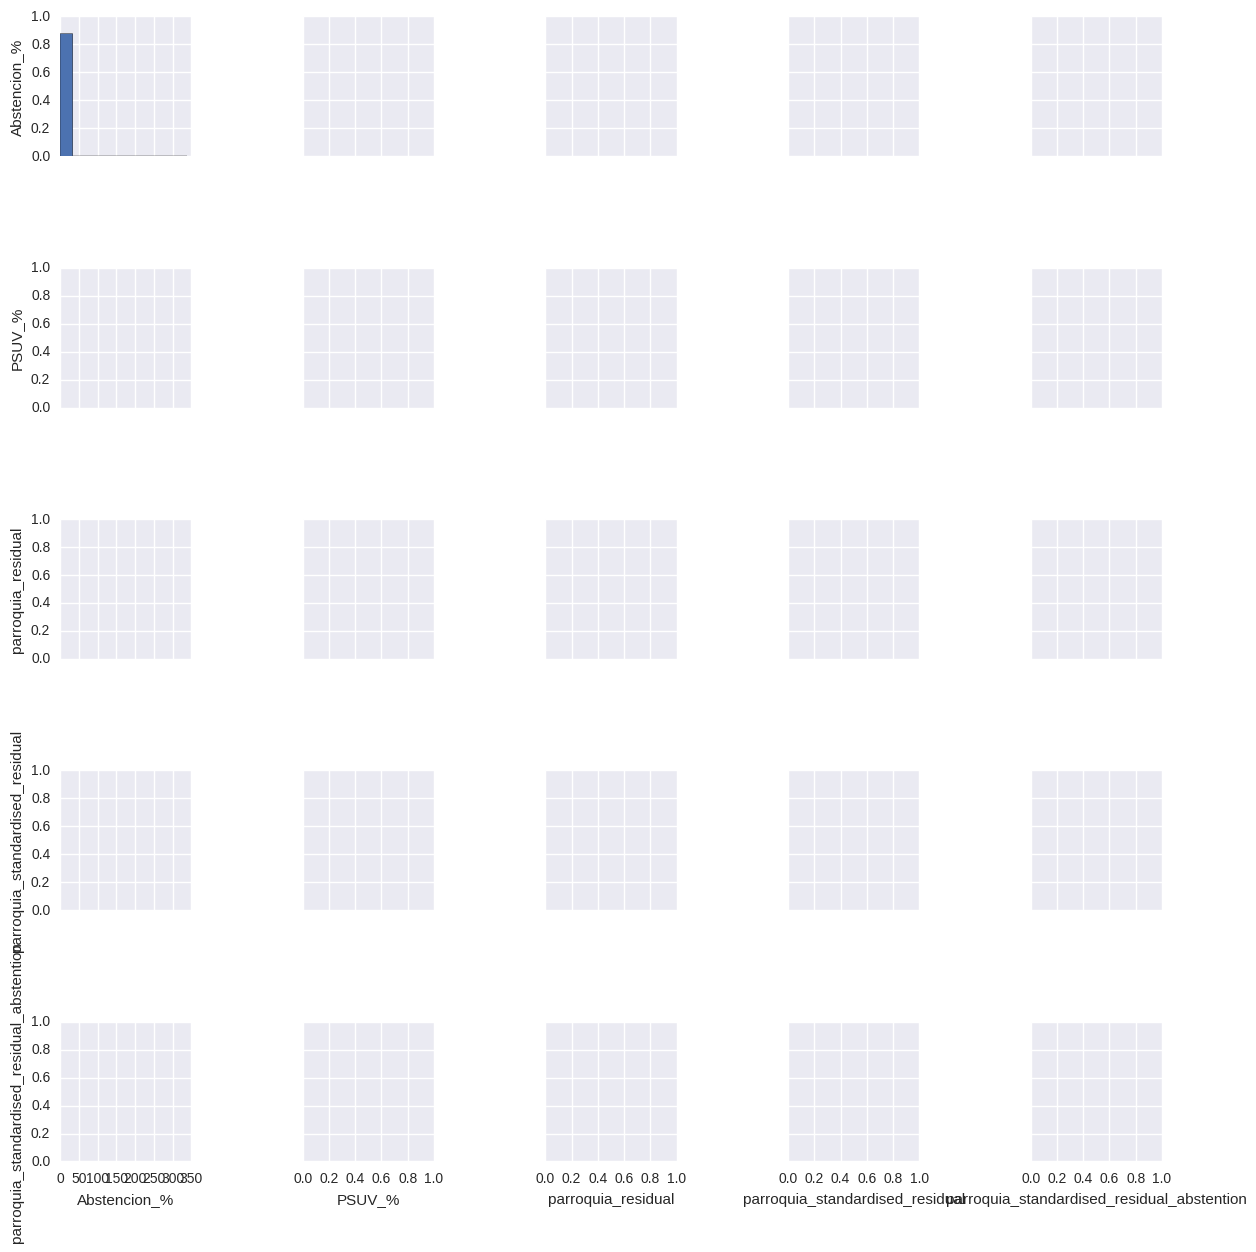

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%','parroquia_residual','parroquia_standardised_residual','parroquia_standardised_residual_abstention']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=50)
plt.xlabel('parroquia_standardised_residual')
plt.ylabel('parroquia_standardised_residual_abstention')
plt.show()

#c = plt.contour(df_out['parroquia_standardised_residual'], df_out['parroquia_standardised_residual_abstention'],z,colors='r',linewidths=4,linestyles='dotted')
#plt.show()

In [ ]:
do_2dplot(df_out,'Abstencion_%','PSUV_%')


# Metrics:

Main metric is the Standardised residuals (SR) or Z-score:


residual_centro = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{centro}})$ 

residual_parroquia = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{parroquia}})$

$\underline{Standardised Residual}$ = $\frac{residual}{\sigma_{residual}}$ for each level (centro, parroquia, municipio...)

Deviations in favour of PSUV are shown on negative values of SR.

# Standardised residual for each mesa with respect to its centro (only centros with more than 1 'mesa'):

Gaussian distribution, if an external source affects the result in a 'mesa', it will affect the whole 'centro electoral'.

No large relative effect observed (slight tails), this can be our control sample. 


In [ ]:
do_SR(df_out)

# Standardised residual for each mesa with respect to its 'parroquia':

Observing slighly larger tails on the negative side, where PSUV would show larger percentange of votes wrt the result in the parroquia.

All histograms are normalised by number of valid votes in the centre.


In [ ]:
do_SR(df_out)


In [ ]:
do_SR_mesa(df_out)


# RESULTS PER STATE:

Effect changes from state to state:
## MERIDA

Visible asymmetry on tails for the parroquia SR.

In [ ]:
do_all(df_out_Merida)
#do_SR(df_out_Merida)

In [ ]:
do_SR_mesa(df_out_Merida)

## VARGAS

In [ ]:
do_SR(df_out_Vargas)

In [ ]:
do_SR_mesa(df_out_Vargas)

## MONAGAS

In [ ]:
do_SR(df_out_MONAGAS)

In [ ]:
do_SR_mesa(df_out_MONAGAS)

## Delta Amacuro

In [ ]:
do_SR(df_deltaA)

In [ ]:
do_SR_mesa(df_deltaA)

## MIRANDA

In [ ]:
do_SR(df_MIRANDA)



In [ ]:
print wtf

In [ ]:
do_SR_mesa(df_MIRANDA)


## LARA

In [ ]:
df_out_Lara.dropna(axis=0,inplace=True)

do_SR(df_out_Lara)


In [ ]:
do_SR_mesa(df_out_Lara)

